# –ú–µ—Ç—Ä–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ 1NN –∏ kNN

**–ó–∞–¥–∞–Ω–∏–µ**

* –ù–∞–π–¥–∏—Ç–µ –ª—É—á—à—É—é –∫–æ–º–±–∏–Ω–∞—Ü–∏—é —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è, –æ–∫–Ω–∞ –∏ —è–¥—Ä–∞ –¥–ª—è –º–µ—Ç–æ–¥–∞ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π. 
* –î–ª—è –ª—É—á—à–µ–π –Ω–∞–π–¥–µ–Ω–Ω–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ F-–º–µ—Ä—ã –æ—Ç —á–∏—Å–ª–∞ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –∏ —à–∏—Ä–∏–Ω—ã –æ–∫–Ω–∞. 
* –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ Leave-One-Out –ø–µ—Ä–µ–∫—Ä—ë—Å—Ç–Ω—É—é –ø—Ä–æ–≤–µ—Ä–∫—É –¥–ª—è –ø–æ–¥—Å—á—ë—Ç–∞ F-–º–µ—Ä—ã.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

## –ö—Ä–∞—Ç–∫–∏–π –æ–±–∑–æ—Ä –¥–∞–Ω–Ω—ã—Ö

In [2]:
data = pd.read_csv("data/iris.csv")
data.head()

sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [3]:
data.info()
data["class"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

–í—Å–µ–≥–æ –∏–º–µ–µ—Ç—Å—è —Ç—Ä–∏ –∫–ª–∞—Å—Å–∞ –∏ —á–µ—Ç—ã—Ä–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞. –ü—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç.

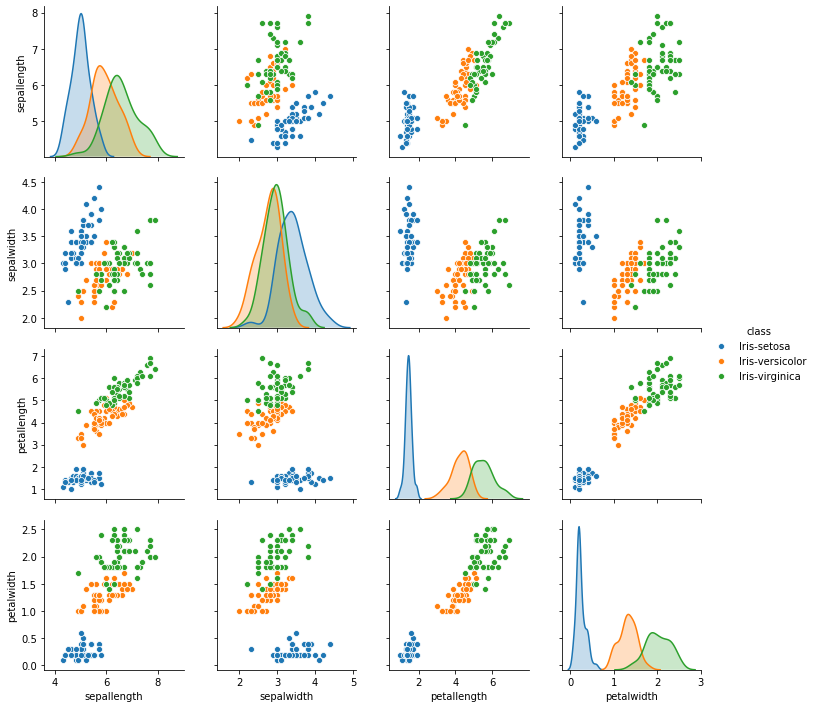

In [4]:
sns.pairplot(data, hue="class")

–í–∏–∑—É–∞–ª—å–Ω–æ –∞—É—Ç–ª–∞–µ—Ä–æ–≤ –Ω–µ—Ç. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è.

–î–∞–Ω–Ω—ã–µ —Ö–æ—Ä–æ—à–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑—É—é—Ç—Å—è, –ø–æ—ç—Ç–æ–º—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –¥–æ–ª–∂–Ω–∞ –¥–∞—Ç—å —Ö–æ—Ä–æ—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [5]:
X = data.drop(columns=["class"])

–ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–ª–∞—Å—Å—ã –≤ —á–∏—Å–ª–∞

In [6]:
lb_maker = LabelEncoder()
y = lb_maker.fit_transform(data["class"])

–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

–ò—Ç–æ–≥–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç

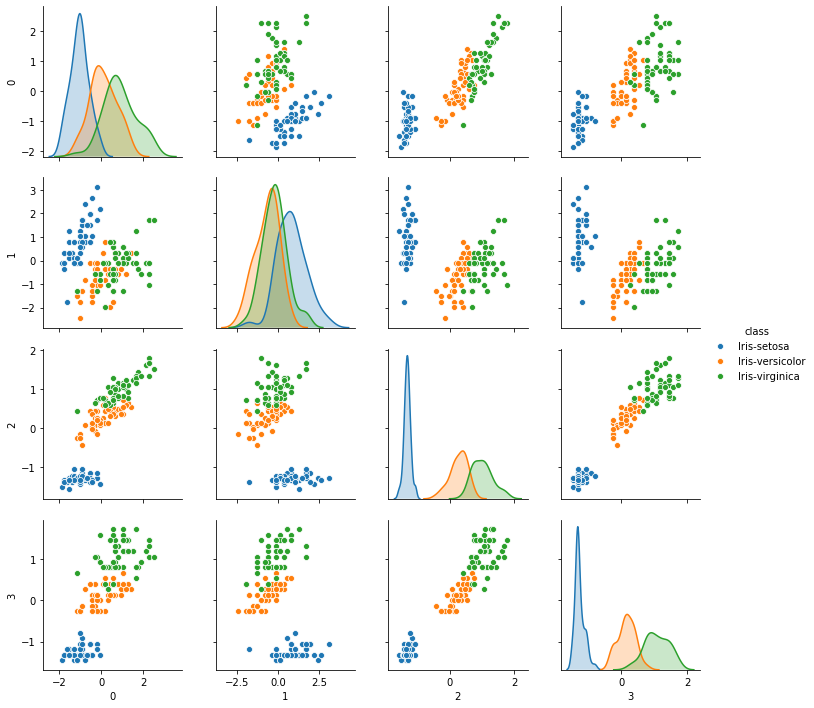

In [8]:
sns.pairplot(pd.concat([pd.DataFrame(X_scaled),data["class"]],axis=1),hue="class")

## –§–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–Ω—è—Ç–∏—è "–±–ª–∏–∑–æ—Å—Ç–∏"

–§—É–Ω–∫—Ü–∏—è –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –º–Ω–æ–∂–µ—Å—Ç–≤–µ $X$: $$\rho: X \times X \rightarrow [0;+\infty).$$

–î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –±–ª–∏–∑–æ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç–æ–≤ —á–∞—â–µ –≤—Å–µ–≥–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Å–ª–µ–¥—É—é—â–∏–µ –º–µ—Ç—Ä–∏–∫–∏:

1. –ú–∏–Ω–∫–æ–≤—Å–∫–æ–≥–æ $$ \rho (x,y)=\left(\sum_i |x_i-y_i|^p\right)^{\frac{1}{p}},$$ 
–≤ —á–∞—Å—Ç–Ω—ã—Ö —Å–ª—É—á–∞—è—Ö –±–µ—Ä—É—Ç $p=1$ (Manhattan), $p=2$ (Euclidian), $p=\infty$ (Chebyshev).


2. –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –ú–∞—Ö–∞–ª–∞–Ω–æ–±–∏—Å–∞ $$\rho(x,y) = \sqrt{(x-y)^{\mathrm T}\mathbf{S}^{-1}(x-y)}, $$
–¥–ª—è –≤–µ–∫—Ç–æ—Ä–æ–≤ –∏–∑ –æ–¥–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü–µ–π $\mathbf S$.


In [9]:
def euclidian(x, y):
    return np.sqrt((x-y)*np.matrix(x-y).T)[0, 0]
    
def manhattan(x, y):
    return np.sum(np.abs(x-y))
    
def chebyshev(x,y):
    return np.max(np.abs(x-y))
    
def mahalanobis(x,y,ss):
    return np.sqrt(np.matrix(x-y).T*np.linalg.pinv(ss)*(x-y))

## –ú–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä

–î–ª—è –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω–æ–≥–æ $x \in X$ –æ—Ç—Ä–∞–Ω–∂–∏—Ä—É–µ–º –æ–±—ä–µ–∫—Ç—ã $x_1,\ldots,x_l$:

$$\rho (x,x^{(1)}) \leq \rho(x,x^{(2)}) \leq \ldots \leq \rho (x, x^{(l)}), $$

$x^{(i)} - $ $i$-–π —Å–æ—Å–µ–¥ –æ–±–µ–∫—Ç–∞ $x$ —Å—Ä–µ–¥–∏ $x_1,\ldots,x_l$;\
$y^{(i)} - $ –æ—Ç–≤–µ—Ç –Ω–∞ $i$-–º —Å–æ—Å–µ–¥–µ –æ–±—ä–µ–∫—Ç–∞ $x$.

**–ú–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:**
$$ a(x; X^l) = \arg \max_{y\in Y} \sum_{i=1}^l [y^{(i)}=y]\, w(i,x),$$
$w(i,x) - $ –≤–µ—Å (—Å—Ç–µ–ø–µ–Ω—å –≤–∞–∂–Ω–æ—Å—Ç–∏) $i$-–≥–æ —Å–æ—Å–µ–¥–∞ –æ–±—ä–µ–∫—Ç–∞ x.

### –ú–µ—Ç–æ–¥ $k$ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π ($k$ nearest neighbors, kNN)

$w(i,x)=[i\leq 1]\,- $ –º–µ—Ç–æ–¥ –±–ª–∏–∂–∞–π—à–µ–≥–æ —Å–æ—Å–µ–¥–∞\
$w(i,x)=[i\leq k]\,-$ –º–µ—Ç–æ–¥ $k$ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π

![alt text](data/diagramintro.jpg)

*–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞:*
* –ø—Ä–æ—Å—Ç–æ—Ç–∞ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏;
* –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å;
* –ø–∞—Ä–∞–º–µ—Ç—Ä k –º–æ–∂–Ω–æ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ –∫–æ–Ω—Ç—Ä–æ–ª—è (leave-one-out): 

$$\mathrm{LOO}(k,X^l) = \sum_{i=1}^l \left [a(x_i;X^l\setminus \{x_i \}, k) \neq y_i \right ] \rightarrow \min_k .$$

*–ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏:*
* —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫ —à—É–º—É;
* –Ω–∏–∑–∫–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å;
* –Ω–µ —É—á–∏—Ç—ã–≤–∞—é—Ç—Å—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –æ–±—ä–µ–∫—Ç–∞–º–∏.

### –ú–µ—Ç–æ–¥ $k$ –≤–∑–≤–µ—à–µ–Ω–Ω—ã—Ö –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π

–†–∞—Å—Å–º–æ—Ç–∏–º $w(i,x)=[i\leq k]w_{(i,x)}$. –í –∫–∞—á–µ—Å—Ç–≤–µ $w_{(i,x)}$ –º–æ–∂–Ω–æ –±—Ä–∞—Ç—å:
* –ª–∏–Ω–µ–π–Ω–æ —É–±—ã–≤–∞—é—â—É—é —Ñ—É–Ω–∫—Ü–∏—é $w_i = \frac{k+1-i}{k}$;
* —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ —É–±—ã–≤–∞—é—â–∏–µ –≤–µ—Å–∞ $w_i = q^i, 0<q<1$;
* —è–¥–µ—Ä–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏.

**Kernel functions**

–§—É–Ω–∫—Ü–∏–∏ —è–¥—Ä–∞ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—Ç —Å–ª–µ–¥—É—é—â–∏–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è–º: 
1. $\displaystyle \int _{-\infty }^{+\infty }K(u)\,du=1 ; $

2. $K(-u)=K(u){\mbox{ for all values of }}u\,.$

–ß–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ —è–¥–µ—Ä–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏
![alt text](data/Kernels.svg.png)

In [10]:
def uniform(r):
    return 1 / 2 if abs(r)<=1 else 0

def triangle(r):
    return (1 - abs(r)) if abs(r)<=1 else 0

def epanechnikov(r):
    return (1 - r ** 2) * 3 / 4 if abs(r)<=1 else 0

def quartic(r):
    return (1 - r ** 2) ** 2 * 15 / 16 if abs(r)<=1 else 0

def triweight(r):
    return 35 / 32 * (1 - r ** 2) ** 3 if abs(r)<=1 else 0

def gaussian(r):
    return 1 / np.sqrt(2 * np.pi) * np.exp((-0.5) * r ** 2)

def cosine(r):
    return np.pi / 4 * np.cos(np.pi / 2 * r) if abs(r)<=1 else 0

**–ú–µ—Ç–æ–¥ –æ–∫–Ω–∞ –ü–∞—Ä–∑–µ–Ω–∞**

$\displaystyle w(i,x)=K\left(\frac{\rho(x,x^{(i)})}{h}\right),$ –≥–¥–µ $h - $ —à–∏—Ä–∏–Ω–∞ –æ–∫–Ω–∞.

–ú–µ—Ç–æ–¥ –ø–∞—Ä–∑–µ–Ω–æ–≤—Å–∫–æ–≥–æ –æ–∫–Ω–∞ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —à–∏—Ä–∏–Ω—ã:
$$ \displaystyle a(x;X^l,h,K) =\arg\max_{y\in Y} \sum_{i=1}^l [y_i = y]\,K\left( \frac{\rho(x,x_i)}{h} \right).$$

–ú–µ—Ç–æ–¥ –ø–∞—Ä–∑–µ–Ω–æ–≤—Å–∫–æ–≥–æ –æ–∫–Ω–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —à–∏—Ä–∏–Ω—ã:
$$ \displaystyle a(x;X^l,k,K) =\arg\max_{y\in Y} \sum_{i=1}^l [y_i = y]\,K\left( \frac{\rho(x,x_i)}{\rho(x,x^{(k+1)})} \right).$$

–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $-$ –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é LOO:
* –≤—ã–±–æ—Ä –º–µ—Ç—Ä–∏–∫–∏ $\rho$
* –≤—ã–±–æ—Ä —à–∏—Ä–∏–Ω—ã –æ–∫–Ω–∞ $h$ –∏–ª–∏ —á–∏—Å–ª–∞ —Å–æ—Å–µ–¥–µ–π $k$
* –≤—ã–±–æ—Ä —è–¥—Ä–∞ $K$

**–í—ã–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤**

–Ø–¥–µ—Ä–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –≤–ª–∏—è—é—Ç –Ω–∞ –≥–ª–∞–¥–∫–æ—Å—Ç—å –≥—Ä–∞–Ω–∏—Ü—ã, —à–∏—Ä–∏–Ω–∞ –æ–∫–Ω–∞ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –ü—Ä–∏ –º–∞–ª–µ–Ω—å–∫–æ–º $h$ –µ—Å—Ç—å —Ä–∏—Å–∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è, –ø—Ä–∏ –±–æ–ª—å—à–æ–º —Ä–∏—Å–∫—É–µ–º –ø–æ–ª—É—á–∏—Ç—å —Å–ª–∏—à–∫–æ–º –≥—Ä—É–±—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä.

### –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ (f1 score)

–î–ª—è –Ω–∞—á–∞–ª–∞ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–ª—É—á–∞–π –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

![alt text](data/table_diagnostic.png)

ùêÖùêç –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –æ—à–∏–±–∫–æ–π –ø–µ—Ä–≤–æ–≥–æ —Ä–æ–¥–∞\
ùêÖùêè –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –æ—à–∏–±–∫–æ–π –≤—Ç–æ—Ä–æ–≥–æ —Ä–æ–¥–∞

**Accuracy**

Accuracy ‚Äî —Å–∞–º–∞—è –ø—Ä–æ—Å—Ç–∞—è –æ—Ü–µ–Ω–∫–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
$$ Accuracy=\frac{TP+TN}{TP+TN+FP+FN}.$$

–ü–æ —Å—É—Ç–∏ —ç—Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –∫–ª–∞—Å—Å –±—É–¥–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω –ø—Ä–∞–≤–∏–ª—å–Ω–æ.

* –†–∞–±–æ—Ç–∞–µ—Ç –¥–ª—è –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.
* –ü–ª–æ—Ö–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –æ–¥–Ω–æ–≥–æ –∏–∑ –∫–ª–∞—Å—Å–æ–≤ —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–µ, —á–µ–º –¥—Ä—É–≥–∏—Ö. –í —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–∂–µ—Ç –¥–∞–≤–∞—Ç—å –≤—ã—Å–æ–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ accuracy.

**Precision**

$$Precision = \frac{TP}{TP+FP}. $$

–ü–æ–ª–Ω–æ—Ç–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫—É—é –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤, —Ä–µ–∞–ª—å–Ω–æ –æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è –∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–º—É –∫–ª–∞—Å—Å—É, –º—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞–ª–∏ –≤–µ—Ä–Ω–æ.

* –¢–æ–ª—å–∫–æ –±–∏–Ω–∞—Ä–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è.
* –ù–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –≤—ã–±–æ—Ä–∫–∏.

**Recall**

$$Recall = \frac{TP}{TP+FN}.$$

–ü–æ–ª–Ω–æ—Ç–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫—É—é –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤, —Ä–µ–∞–ª—å–Ω–æ –æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è –∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–º—É –∫–ª–∞—Å—Å—É, –º—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞–ª–∏ –≤–µ—Ä–Ω–æ.

* –¢–æ–ª—å–∫–æ –±–∏–Ω–∞—Ä–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è.
* –ù–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –≤—ã–±–æ—Ä–∫–∏.

**F-measure**

–¢–æ—á–Ω–æ—Å—Ç—å –∏ –ø–æ–ª–Ω–æ—Ç–∞ —Ö–æ—Ä–æ—à–æ –æ—Ü–µ–Ω–∏–≤–∞—é—Ç –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –¥–ª—è –∑–∞–¥–∞—á —Å —Å–º–µ—â–µ–Ω–Ω–æ–π –∞–ø—Ä–∏–æ—Ä–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é, –Ω–æ –µ—Å–ª–∏ –º—ã –æ–±—É—á–∏–ª–∏ –º–æ–¥–µ–ª—å —Å –≤—ã—Å–æ–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç—å—é, —Ç–æ –º–æ–∂–µ—Ç —Å–ª—É—á–∏—Ç—å—Å—è —Ç–∞–∫, —á—Ç–æ –ø–æ–ª–Ω–æ—Ç–∞ —É —Ç–∞–∫–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –Ω–∏–∑–∫–∞—è –∏ –Ω–∞–æ–±–æ—Ä–æ—Ç. –ß—Ç–æ–±—ã —Å–≤—è–∑–∞—Ç—å —Ç–æ—á–Ω–æ—Å—Ç—å —Å –ø–æ–ª–Ω–æ—Ç–æ–π –≤–≤–æ–¥—è—Ç F-–º–µ—Ä—É –∫–∞–∫ —Å—Ä–µ–¥–Ω–µ–µ –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–æ–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ –ø–æ–ª–Ω–æ—Ç—ã:

$$F_{measure}=2\frac{Precision \cdot Recall}{Precision + Recall} $$

**–ú–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è**

–ò–∑–Ω–∞—á–∞–ª—å–Ω–æ F-–º–µ—Ä–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —Ç–æ–ª—å–∫–æ –¥–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ–¥—Ö–æ–¥–æ–≤:
* One vs one classification
* One vs all (one vs rest
* Hierarchical classification
* Confusion matrix

https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/

In [11]:
def f1_score(y_pr, y_tr, average="micro"):
    cm = confusion_matrix(y_pr,y_tr)
    result_score = 0
    if average == 'macro':
        f_scores = np.zeros(cm.shape[0])
        for idx in range(len(f_scores)):
            tp = cm[idx, idx]
            fp = np.sum(cm[idx, :]) - tp
            fn = np.sum(cm[:, idx]) - tp
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f_scores[idx] = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        result_score = np.mean(f_scores)
    elif average == 'micro':
        tp = np.trace(cm)
        fp = fn = np.sum(cm) - tp
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        result_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return result_score

### –†–µ–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞

In [1]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['', 'globals()'],
 '_oh': {},
 '_dh': ['C:\\Users\\z003zywu\\subprojects\\labs\\1. kNN'],
 'In': ['', 'globals()'],
 'Out': {},
 'get_ipython': <bound method InteractiveShell.get_ipython of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x000001FCD980E898>>,
 'exit': <IPython.core.autocall.ZMQExitAutocall at 0x1fcda4779b0>,
 'quit': <IPython.core.autocall.ZMQExitAutocall at 0x1fcda4779b0>,
 '_': '',
 '__': '',
 '___': '',
 '_i': '',
 '_ii': '',
 '_iii': '',
 '_i1': 'globals()'}

In [12]:
class KNNClassifier:
    
    def __init__(self, window, metric, kernel_name):
        self.window = window # fixed or variable
        self.metric = metric
        self.kernel_name = kernel_name
        self.neighbor_param = None
        self.f_scores = None
        self.best_score = None
        self.distances = None
        
    def rho(self, x, y):
        return globals()[self.metric](np.array(x), np.array(y))
        
    def kernel(self, r):
        return globals()[self.kernel_name](r)
    
    def classify(self, y_train, neighbor_param, idx_row):
        dists = self.distances[idx_row,:]
        dists_argsort = self.distances_argsort[idx_row,:]
        classes = list(set(y_train)) 
        closeness = np.zeros_like(classes,dtype=np.float32) 
        
        if self.window == 'fixed':
            h = neighbor_param
            n_neighbors = np.argmax(dists[dist_argsort] > h) if any(dists[dist_argsort] > h) else len(dists) + 1
        elif self.window == 'variable':
            n_neighbors = neighbor_param
            h = dists[dists_argsort[n_neighbors]]
        for idx in range(n_neighbors):
            neighbor_class = y_train[dists_argsort[idx]]
            closeness[neighbor_class] += self.kernel(dists[dists_argsort[idx]]/h)
        y_predict = classes[np.argmax(closeness)]
        return y_predict
    
    def fit(self, X, y):
        # distance precalculation
        self.distances = np.empty((len(y), len(y)-1))
        self.distances_argsort = np.empty((len(y), len(y)-1),dtype=np.int)
        for idx_i in range(len(y)-1):
            for idx_j in range(idx_i+1, len(y)):
                self.distances[idx_j, idx_i] = self.distances[idx_i, idx_j-1] = self.rho(X[idx_i,:], X[idx_j,:])
        for idx_i in range(len(y)):
            self.distances_argsort[idx_i,:] = np.argsort(self.distances[idx_i,:])
        # LOO optimization    
        self.f_scores = np.zeros(2*len(y)//3)
        for nn in range(1, len(self.f_scores)):         
            y_pred = np.zeros(X.shape[0])
            for idx_row in range(X.shape[0]):
                y_train = np.delete(y, idx_row)
                y_pred[idx_row] = self.classify(y_train,nn,idx_row)
            f_score = f1_score(y_pred, y)
            self.f_scores[nn] = f_score
        self.n_neighbors = np.argmax(self.f_scores)
        self.best_score = self.f_scores[self.n_neighbors]
        print(f"Metric: {self.metric}, kernel: {self.kernel_name}, n_neighbors: {self.n_neighbors}, f_score: {self.best_score}")
        return self.n_neighbors, self.best_score

In [13]:
metrics = ['manhattan', 'chebyshev', 'euclidian']
kernels = ['uniform', 'triangle', 'epanechnikov', 'quartic', 'triweight', 'gaussian', 'cosine']
f_scores = np.zeros((len(metrics),len(kernels)))
n_neighbors = np.zeros((len(metrics),len(kernels)))
for idx_m in range(len(metrics)):
    for idx_k in range(len(kernels)):
        knn = KNNClassifier('variable', metrics[idx_m], kernels[idx_k])
        knn.fit(X_scaled,y)
        f_scores[idx_m, idx_k] = round(knn.best_score,4)
        n_neighbors[idx_m, idx_k] = knn.n_neighbors

C:\Users\z003zywu\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


Metric: manhattan, kernel: uniform, n_neighbors: 15, f_score: 0.96
Metric: manhattan, kernel: triangle, n_neighbors: 63, f_score: 0.9533333333333334
Metric: manhattan, kernel: epanechnikov, n_neighbors: 5, f_score: 0.9533333333333334
Metric: manhattan, kernel: quartic, n_neighbors: 70, f_score: 0.9533333333333334
Metric: manhattan, kernel: triweight, n_neighbors: 78, f_score: 0.9533333333333334
Metric: manhattan, kernel: gaussian, n_neighbors: 15, f_score: 0.96
Metric: manhattan, kernel: cosine, n_neighbors: 58, f_score: 0.9533333333333334
Metric: chebyshev, kernel: uniform, n_neighbors: 18, f_score: 0.96
Metric: chebyshev, kernel: triangle, n_neighbors: 3, f_score: 0.9533333333333334
Metric: chebyshev, kernel: epanechnikov, n_neighbors: 3, f_score: 0.9533333333333334
Metric: chebyshev, kernel: quartic, n_neighbors: 3, f_score: 0.9533333333333334
Metric: chebyshev, kernel: triweight, n_neighbors: 43, f_score: 0.96
Metric: chebyshev, kernel: gaussian, n_neighbors: 11, f_score: 0.96
Metr

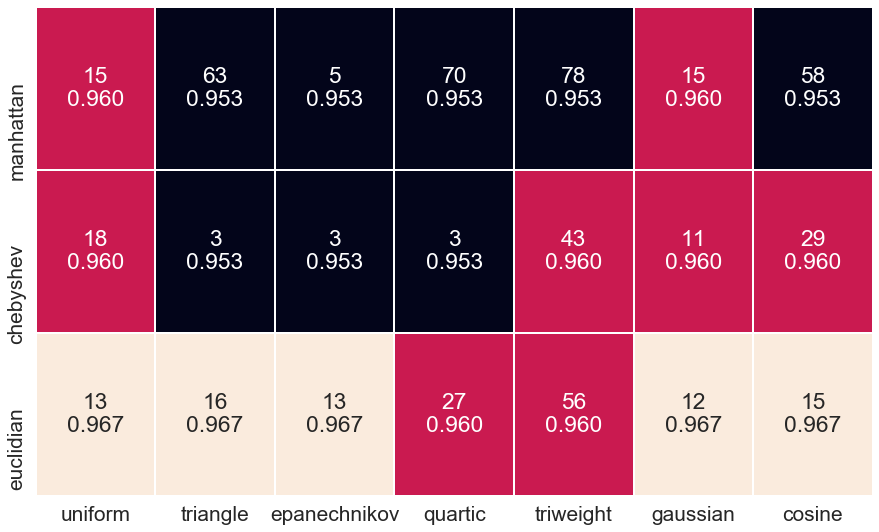

In [14]:
labels = (np.asarray([f"{nn:.0f}\n{f_score:.3f}" for nn, f_score in zip(n_neighbors.flatten(), f_scores.flatten())],dtype=str)).reshape(len(metrics),len(kernels))
sns.set(font_scale=1.9)
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(f_scores,linewidths=1,annot=labels,fmt='',ax=ax,cbar=False,xticklabels=kernels,yticklabels=metrics)

–ö–∞–∫ –≤–∏–¥–Ω–æ, –ª—É—á—à–µ –≤—Å–µ–≥–æ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –µ–≤–∫–ª–∏–¥–æ–≤—ã–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ–º.\
–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ F-–º–µ—Ä—ã –æ—Ç —á–∏—Å–ª–∞ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –¥–ª—è –ª—É—á—à–∏—Ö —è–¥–µ—Ä.

In [16]:
scores = {}
for kernel in ['uniform', 'triangle', 'epanechnikov', 'gaussian', 'cosine']:
    knn = KNNClassifier("variable", "euclidian", kernel)
    knn.fit(X_scaled, y)
    scores[kernel] = knn.f_scores
df_scores = pd.DataFrame(data=scores)


C:\Users\z003zywu\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


Metric: euclidian, kernel: uniform, n_neighbors: 13, f_score: 0.9666666666666667
Metric: euclidian, kernel: triangle, n_neighbors: 16, f_score: 0.9666666666666667
Metric: euclidian, kernel: epanechnikov, n_neighbors: 13, f_score: 0.9666666666666667
Metric: euclidian, kernel: gaussian, n_neighbors: 12, f_score: 0.9666666666666667
Metric: euclidian, kernel: cosine, n_neighbors: 15, f_score: 0.9666666666666667


Text(0, 0.5, 'F-score')

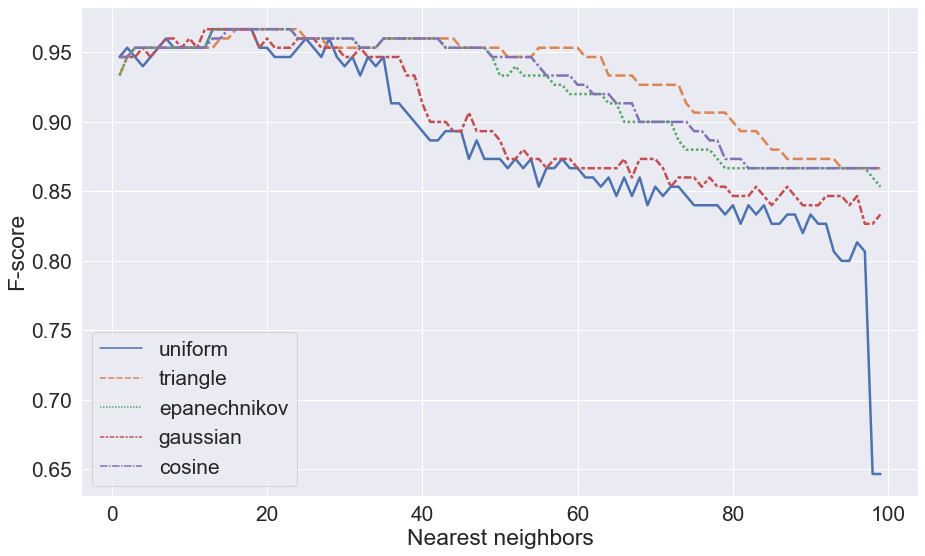

In [21]:
f, ax = plt.subplots(figsize=(15, 9))
sns.lineplot(data=df_scores.drop(index=0), ax=ax, linewidth=2.5)
plt.xlabel("Nearest neighbors")
plt.ylabel("F-score")

Text(0, 0.5, 'F-score')

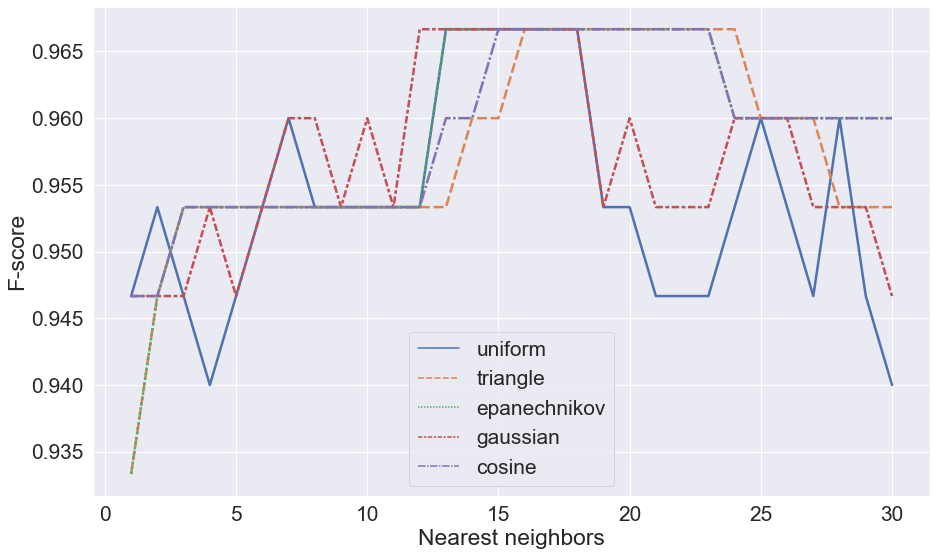

In [22]:
f, ax = plt.subplots(figsize=(15, 9))
sns.lineplot(data=df_scores.drop(index=0).iloc[:30,:], ax=ax, linewidth=2.5)
plt.xlabel("Nearest neighbors")
plt.ylabel("F-score")